In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [33]:

data['Age Group'] = pd.cut(data['Age'], bins=[0, 19, 29,39,49,59,  float('inf')], labels=['Under 20', '20-29', '30-39', '40-49', '50-59', '60 and above'], right=False)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,20-29
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,20-29
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,20-29
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,20-29
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,20-29


Exploring the data set to know the size, dimension and shape of the data

In [24]:
# dimension
data.ndim


2

In [25]:
data.size

5236

In [26]:
data.shape


(374, 14)

In [27]:
# Checking the data type
data.dtypes

Person ID                     int64
Gender                       object
Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                 object
Blood Pressure               object
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder               object
Age Group                  category
dtype: object

In [28]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [29]:
# checking how the various columns in the dataset correlate with each other
data.corr()


C:\Users\TEST\AppData\Local\Temp\ipykernel_6108\3574769119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


### Are there any trends or patterns based on age groups?
We would first calculate the average Physical activity level with respect to the Age group and display it on a chart to observe the trend in physical activity level based on age group.


Age Group
Under 20              NaN
20-29           42.000000
30-39           54.650000
40-49           60.553719
50-59           62.637363
60 and above    75.000000
Name: Physical Activity Level, dtype: float64
Age Group
Under 20              NaN
20-29           80.333333
30-39           70.328571
40-49           69.842975
50-59           70.054945
60 and above    68.000000
Name: Heart Rate, dtype: float64


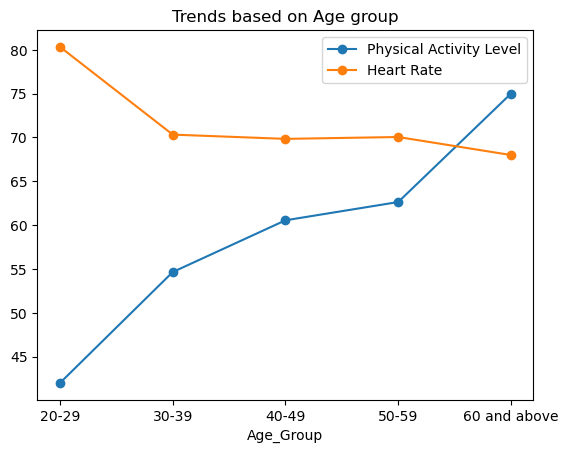

In [34]:
average_Activity_Level_by_Age = data.groupby('Age Group')['Physical Activity Level'].mean()
average_Heart_Rate_by_Age = data.groupby('Age Group')['Heart Rate'].mean()
print(average_Activity_Level_by_Age)
print(average_Heart_Rate_by_Age)
# Display the average sleep quality for each stress level
plt.plot(average_Activity_Level_by_Age ,marker='o',linestyle='-')
plt.plot(average_Heart_Rate_by_Age,marker='o',linestyle='-')
plt.xlabel('Age_Group')
plt.title('Trends based on Age group')
plt.legend(['Physical Activity Level', 'Heart Rate'])
plt.show()


Based on the chart above, we observe a positive correlation between physical activity level and age group whilst there is a negative correlation between Heart Rate and Age group. It's evident that the age group 20-29 exhibits the lowest activity level of 42 and highest heart rate of value 80.333 bpm, whilst the age group 60 and above demonstrates the highest activity level of 75 and lowest heart rate value of 68.00 bpm. Based on an article from healthline.com, the average normal resting heart rate for adult based on age should be as below:
Age range(years)                   :          Average resting heart rate(bpm)
18 - 20                            :                    81.6, 
21 - 30                            :                    80.2, 
31 - 40                            :                    78.5, 
41 - 50                            :                    75.3, 
51 - 60                            :                    73.9,  
71 - 80                            :                    74.2, 
over 80                            :                    78.1,     

This means that the people with the ages of 20-29 have a fairly normal resting heart rate withe the remaining agese having however according to forbes.com and medicinenet.com, the normal resting heart rate when not excercising should be 60 - 100 bpm for people with age 15 and above hence all the people have a normal heart rate.


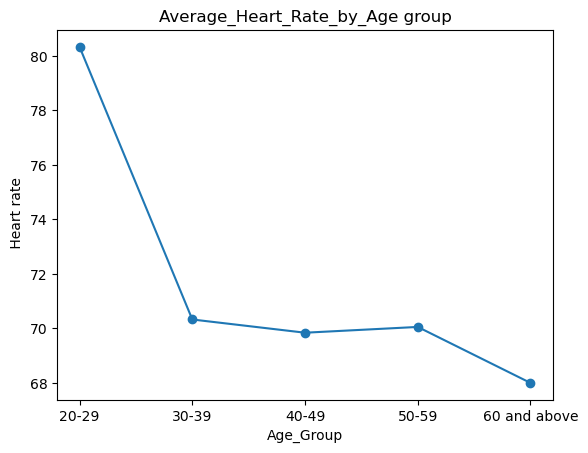

In [35]:

average_Heart_Rate_by_Age = data.groupby('Age Group')['Heart Rate'].mean()

plt.plot(average_Heart_Rate_by_Age,marker='o',linestyle='-')
plt.xlabel('Age_Group')
plt.ylabel(' Heart rate')
plt.title('Average_Heart_Rate_by_Age group')
plt.show()

### Can we identify any relationship between sleep quality and physical activity level?

In [14]:
average_sleep_quality_by_activity = data.groupby('Physical Activity Level')['Quality of Sleep'].mean()

# Display the average sleep quality for each stress level
print(average_sleep_quality_by_activity)

Physical Activity Level
30    7.352941
32    4.000000
35    5.000000
40    5.833333
42    6.000000
45    6.529412
47    6.000000
50    6.750000
55    7.333333
60    7.914286
65    7.000000
70    8.000000
75    8.014925
80    9.000000
85    9.000000
90    7.074627
Name: Quality of Sleep, dtype: float64


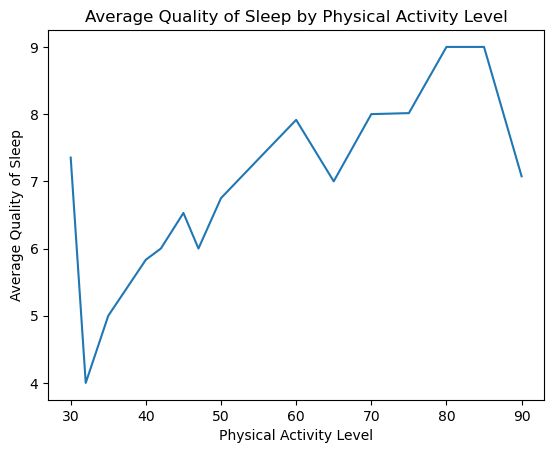

In [15]:
average_sleep_quality_by_activity.plot(kind='line')
plt.xlabel('Physical Activity Level')
plt.ylabel('Average Quality of Sleep')
plt.title('Average Quality of Sleep by Physical Activity Level')
plt.show()

### Is there a correlation between stress levels and sleep duration/quality? How does stress impact the sleep patterns of different age groups?

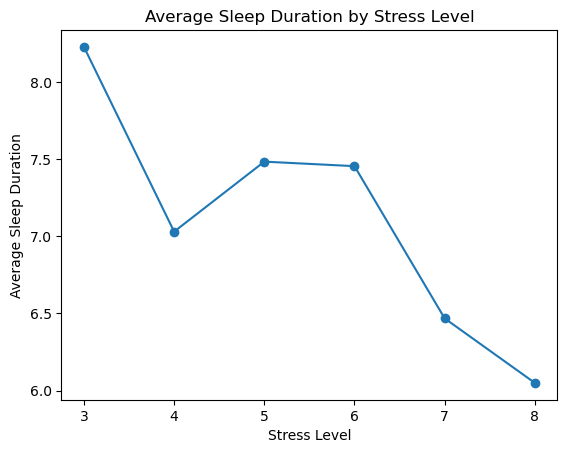

In [31]:

average_sleep_duration_by_stress = data.groupby('Stress Level')['Sleep Duration'].mean()
# Plot a line plot for average sleep duration by stress level
plt.plot(average_sleep_duration_by_stress, marker='o', linestyle='-')
plt.xlabel('Stress Level')
plt.ylabel('Average Sleep Duration')
plt.title('Average Sleep Duration by Stress Level')
plt.show()

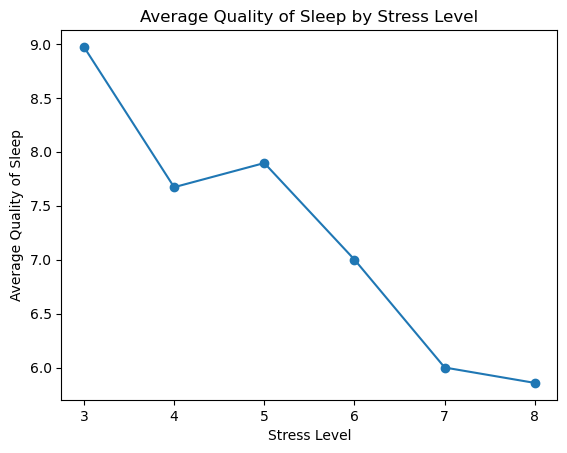

In [17]:
average_sleep_quality_by_stress = data.groupby('Stress Level')['Quality of Sleep'].mean()
plt.plot(average_sleep_quality_by_stress, marker='o', linestyle='-')
plt.xlabel('Stress Level')
plt.ylabel('Average Quality of Sleep')
plt.title('Average Quality of Sleep by Stress Level')
plt.show()

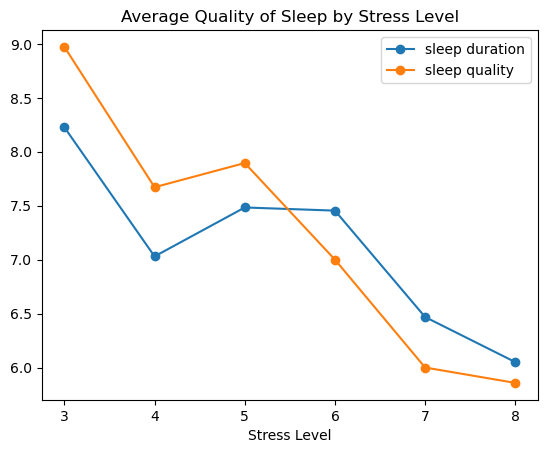

In [43]:
# Plot a line plot for average sleep duration by stress level

average_sleep_duration_by_stress = data.groupby('Stress Level')['Sleep Duration'].mean()
# Plot a line plot for average sleep duration by stress level
plt.plot(average_sleep_duration_by_stress, marker='o', linestyle='-')
plt.xlabel('Stress Level')
#plt.ylabel('Average Sleep Duration')
plt.title('Average Sleep Duration by Stress Level')

average_sleep_quality_by_stress = data.groupby('Stress Level')['Quality of Sleep'].mean()
# Plot a line plot for average sleep quality by stress level
plt.plot(average_sleep_quality_by_stress, marker='o', linestyle='-')
plt.xlabel('Stress Level')
#plt.ylabel('Average Quality of Sleep')
plt.title('Average Quality of Sleep by Stress Level')
plt.legend(['sleep duration','sleep quality'])
plt.show()

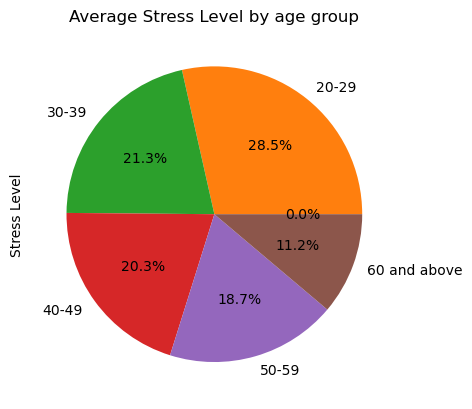

In [44]:
average_Stress_Level_by_Age = data.groupby('Age Group')['Stress Level'].mean()

average_Stress_Level_by_Age.plot(kind='pie',autopct='%1.1f%%')
plt.title('Average Stress Level by age group')

#plt.legend(['Age Group'])
plt.show()